# MULTIMEDIA 
## PROJECT 1: Image Compression
### B.Sc. in Informatics Engineering, FCTUC

Authors: 
 - André Carvalho, no. 2019216156
 - Paulo Cortesão, no. 2019216517

In [186]:
# package installation
# ! pip install tabulate
# ! pip3 install opencv-python

In [187]:
# code imports
import matplotlib
import os
from scipy.fftpack import dct, idct
import math
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.colors as clr
import numpy as np
import cv2
from tabulate import tabulate

In [188]:
#exercise 1: image compression testing
def ex1():
    images= ['barn_mountains' ,'logo','peppers']
    qualities = [75,50,25,10 ,1]
    rates=[]
    for s in images:
        img = Image.open(f"images/{s}.bmp")
        rgb_img = img.convert('RGB')
        arr=[s]
        original_size = os.path.getsize(f"images/{s}.bmp")
        plt.figure()
        plt.title(f'{s}.bmp')
        plt.imshow(img)
        for q in qualities:
            rgb_img.save(f"ex1/{s}_{q}.jpeg", quality=q)
            im2 = Image.open(f"ex1/{s}_{q}.jpeg")
            plt.figure()
            plt.title(f'{s}_{q}.jpeg')
            plt.imshow(im2)
            compressed_size = os.path.getsize(f"ex1/{s}_{q}.jpeg")
            comp_rate = "%.1f:1" %(original_size/compressed_size)
            arr.append(comp_rate)
        rates.append(arr)
    head = ['Image\\Quality']+[f'{p}%' for p in qualities]

    # print(46*"_")
    print(tabulate(rates, headers = head ))
            # print(f"{s} with quality {q}: compression rate {comp_rate}%")

Image\Quality    75%     50%     25%     10%      1%
---------------  ------  ------  ------  -------  -------
barn_mountains   12.5:1  19.1:1  29.8:1  53.7:1   110.5:1
logo             53.8:1  66.6:1  81.3:1  101.2:1  126.4:1
peppers          25.1:1  37.6:1  55.9:1  89.1:1   137.2:1


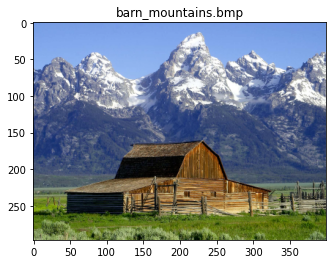

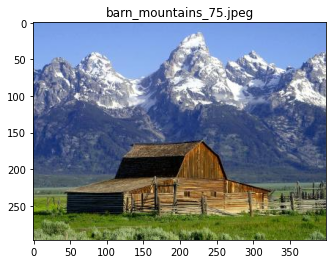

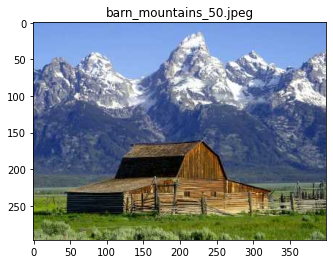

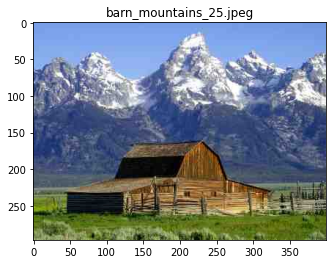

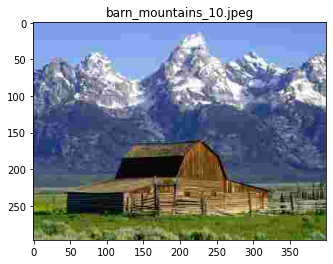

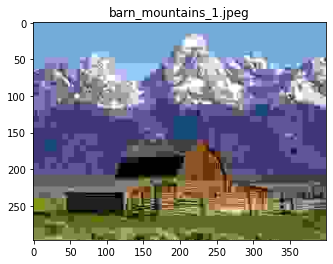

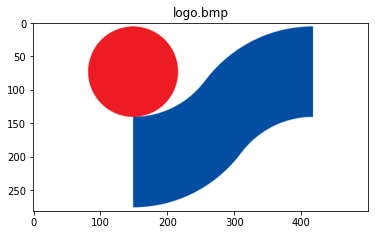

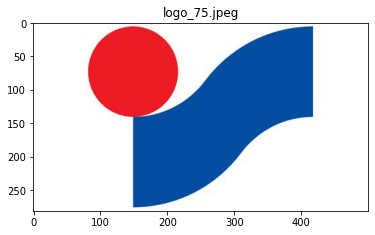

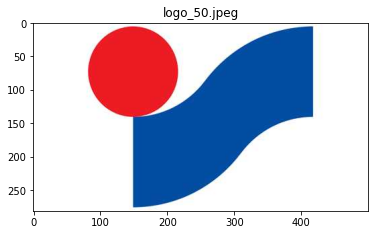

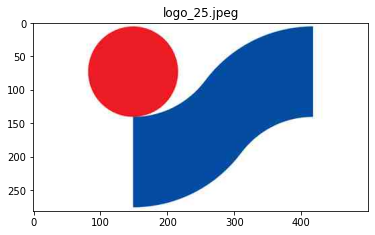

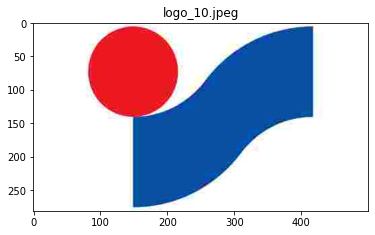

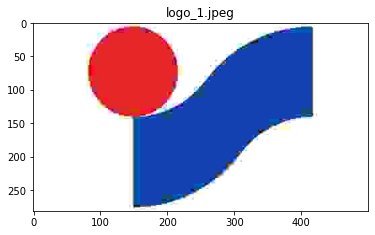

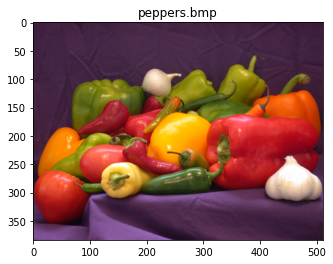

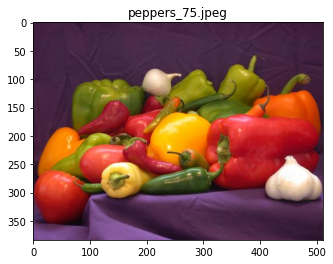

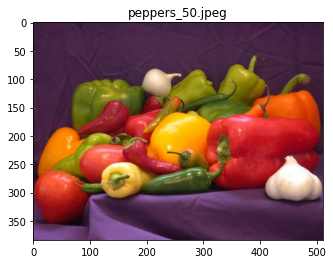

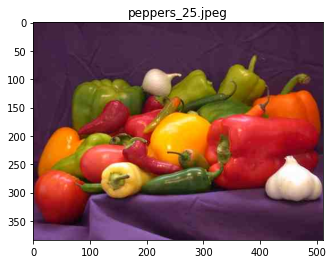

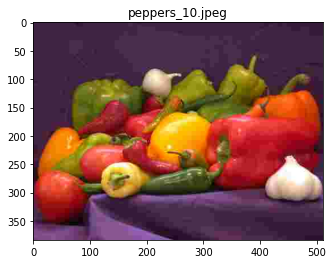

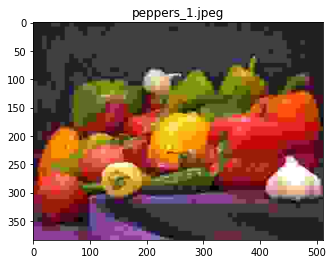

In [189]:
ex1()

# Results
### barn_mountain.jpeg image

As the quality goes down, there is a somewhat perceptible decrease in detail, especially in zones of the image where there is alternance between light and dark colour within a short range of pixels. This can be explained by the smoothing that is undertaken in JPEG.

Also because of this phenomenon, the contours that the image might have are made less crisp, and some interference between different colours of the respective areas is also verified. This is especcially evident when comparing the original bmp file to the compressed files (mountain-sky interfaces).

### peppers.jpeg image

As is expected, there is also a decrease in detail in this image, as quality decreases. The contours of each vegetable are also affected, but in this case, the smoothing also affects the perceived light reflection coming from the vegetables in general. 

### logo.jpeg image

In this image, which only contains 3 colours, the loss in detail and interference in the various contours is the most evident feature, when analysing different qualities. However, the colour representation within the objects' borders remains accurate, as there is only one colour being represented.

### General Conclusions

Overall, the most apparent quality losses can be noticed in contours and in zones with sharp colour transitions. However, if we consider the compression rates achieved by this format, the storage required is well exploited to represent the images with maximum detail. 

It was also verified that the image with the least features (logo.bmp) had the highest compression rate (81.3:1, 25% quality), whereas the image with most details (barn_mountain.bmp) had the lowest one (29.8:1, 25% quality). This leads to the conclusion that detail makes an image harder to compress.

In [190]:
# 3.2 -used-defined colormap
def color_map(color_map_name, min_color=(0,0,0), max_color = (1,1,1)) :
    return clr.LinearSegmentedColormap.from_list(color_map_name, [min_color,max_color], 256) 
#colormaps 
cmRed = color_map('myRed', (0,0,0),(1,0,0))
cmGreen = color_map('myGreen', (0,0,0),(0,1,0) )
cmBlue = color_map( 'myBlue', (0,0,0),(0,0,1))
 
# 3.3 -image visualization with colormap
def view_image(img, color_map,title="<untitled>"):
    plt.figure()
    plt.title(title)
    plt.imshow(img, color_map)
    plt.show(block=False)

#3.4 - channel separation and union
def separate_3channels(image):
    return (image[:,:,0], image[:,:,1], image[:,:,2])

def join_3channels(r,g,b):
    return  np.dstack((r,g,b))

def ex3():
    #3.1 - reading barn_mountains.bmp
    img_bm = plt.imread("images/barn_mountains.bmp")

    #3.5 - channel visualization
    r,g,b = separate_3channels(img_bm)
    

    d = {'red':cmRed, 'green': cmGreen, 'blue': cmBlue }
    e = {'red': r, 'green':g, 'blue':b}
    for col in d.keys():
        view_image(e[col],d[col], col)
    return img_bm

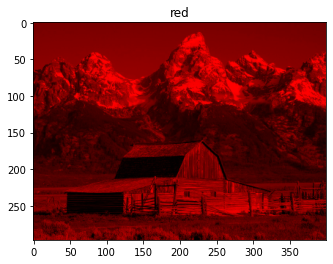

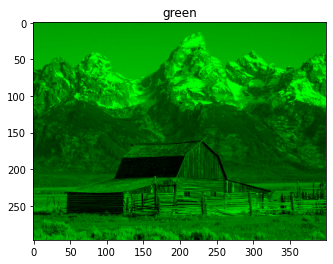

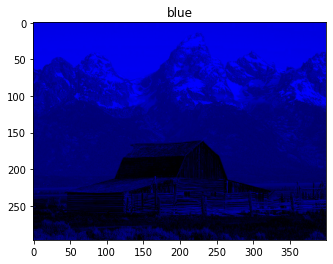

In [191]:
img_bm = ex3()

In [192]:
#4 - Padding pre-processing
#Receives a 3D array (all 3 channels)
def image_padding(img, ds_rate, bs):

    mult=0
    if (ds_rate[2]==0):
        mult=(ds_rate[0]//ds_rate[1]) * bs
    else: 
        mult= (ds_rate[0]// min(ds_rate)) * bs


    sh = or_shape = img.shape
    last_line = img[len(img)-1,:,:]
    if (len(img)%mult!=0):   
        arr_to_add = np.tile(last_line, (mult-len(img)%mult,1)).reshape(mult-len(img)%mult,or_shape[1],3)
        img = np.vstack((img, arr_to_add))

    last_col = np.array([img[:, len(img[0])-1, :]])
    sh= img.shape
    if(sh[1]%mult!=0):
        arr_to_add = np.tile(last_col, (1,mult-sh[1]%mult)).reshape(sh[0], mult-sh[1]%mult,3)
        img = np.hstack((img, arr_to_add))

    return img, or_shape

def image_remove_padding(img, shape):
    h,c = shape[0], shape[1]
    return img[:h,:c,:]

def ex4():
    print("Original image shape: ",img_bm.shape)
    img_bm_padded, original_shape = image_padding(img_bm, (4,2,2), 8)
    print("Padded image shape: ",img_bm_padded.shape)
    img_bm_no_padding = image_remove_padding(img_bm_padded, original_shape)
    print("Image with padding removed shape: ",img_bm_no_padding.shape)
    print("Removal correct? " , np.array_equal(img_bm_no_padding, img_bm))
    return img_bm_padded

In [193]:
img_bm_padded = ex4()

Original image shape:  (297, 400, 3)
Padded image shape:  (304, 400, 3)
Image with padding removed shape:  (297, 400, 3)
Removal correct?  True


In [194]:
def compare_3channels(ch1_1, ch2_1, ch3_1, ch1_2, ch2_2, ch3_2):
    eqs1 = [ch1_1, ch2_1, ch3_1]
    eqs2 = [ch1_2, ch2_2, ch3_2]
    equals=0
    for i in range(len(eqs1)):
        howmany=np.count_nonzero(np.abs(eqs1[i]-eqs2[i])>0.000001)
        if howmany==0: 
            equals +=1
        else:
            print('no of different pixels: ',np.count_nonzero(np.abs(eqs1[i]-eqs2[i])>0.000001))
            view_image(eqs1[i],cmGray,'original')
            view_image(eqs2[i],cmGray,'encoded')
            view_image(eqs2[i]-eqs1[i],cmGray,'difference')
    print(f'no of equal channels:{equals}')

In [195]:
#5 - conversion to the YCbCr model

RGB2YCBCR=np.array([[0.299,0.587,0.114],[-0.168736, -0.331264, 0.5],[0.5, -0.418688, -0.081312]])
YCBCR2RGB=np.linalg.inv(RGB2YCBCR)
min_cb = (0.5,0.5,0)
max_cb = (0.5,0.5,1)
min_cr = (0,0.5,0.5)
max_cr = (1,0.5,0.5)
cmGray = color_map('myGray', (0,0,0),(1,1,1) )
cmChromBlue = color_map('myCb', tuple(min_cb),  tuple(max_cb) )
cmChromRed = color_map('myCr', tuple(min_cr),  tuple(max_cr) )

def rbg2ycbcr(img):
    ycc= img.dot(RGB2YCBCR.T)
    ycc[:,:,1:3] += 128
    return ycc

def ycbcr2rgb(img):
    
    img[:,:,1:3] -= 128
    recovered = img.dot(YCBCR2RGB.T)
    recovered[recovered < 0]=0
    recovered[recovered > 255]=255
    recovered= np.round(recovered)
    return recovered.astype(np.uint8)

def ex5():
    chromin_image = rbg2ycbcr(img_bm_padded)
    
    y, cb,cr = separate_3channels(chromin_image)

    d = {'gray': cmGray,  'chromBlue':cmChromBlue, 'chromRed':cmChromRed }
    e = {'gray': y, 'chromBlue':cb, 'chromRed':cr}
    for col in d.keys():
        view_image(e[col],d[col],col)
    return y,cb,cr


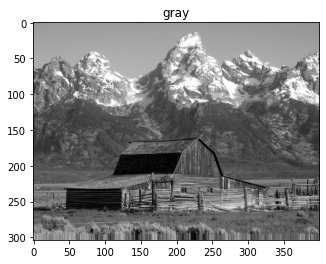

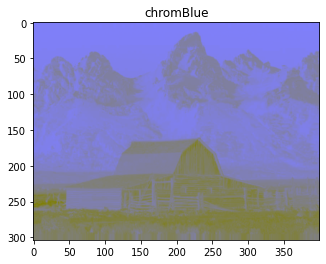

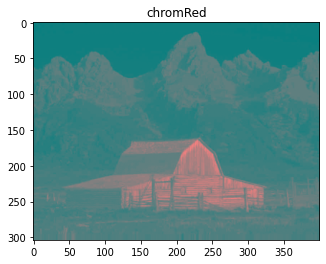

In [196]:
y,cb,cr = ex5()

### 5.4 Image comparison

From the analysis of the images generated, it is clear that while there is a good deal of detail in all the RGB channels, only in the Y channel of the YCbCr encoding is there comparable definition (very similar to the one that occurs in the G channel, which represents the colour the human eye is most sensitive to).  As well as this, a significant positive correlation between the values in the RGB channels makes this format bear some redundancy, as can be seen in the several light or dark colours present in the image. Because of this, using YCbCr allows for a greater compression potential, as that redundancy is essentially concentrated in just one channel, while the chrominance, less perceptible to the human eye, is distributed among the remaining two channels (Cb and Cr), which can be destructively compressed later.

In [197]:
# 6 - downsampling and upsampling



def ycrcb_downsampling_cv2(y,cr,cb, comp_ratio): # comp_ratio is a tuple with 3 values, such as (4,2,2)
    cr_d=cb_d=np.array([])
    sh = y.shape
    lines, columns = sh[0], sh[1]
    if comp_ratio[2]!= 0: #horizontal only
        cr_ratio= comp_ratio[0]//comp_ratio[1]
        columns /= cr_ratio
        cr_d = cv2.resize(cr, None, fx = 1/cr_ratio, fy=1, interpolation = cv2.INTER_AREA )
        cb_ratio = comp_ratio[0]//comp_ratio[2]
        columns = sh[1]//cb_ratio
        cb_d = cv2.resize(cb, None, fx = 1/cb_ratio, fy=1, interpolation = cv2.INTER_AREA )

    else: #  horizontal and vertical
        cb_ratio=cr_ratio=comp_ratio[0]//comp_ratio[1]
        lines /= cr_ratio
        columns /= cr_ratio
        cr_d = cv2.resize(cr, None, fx = 1/cr_ratio, fy=1/cr_ratio, interpolation = cv2.INTER_AREA )
        cb_d = cv2.resize(cb, None, fx = 1/cb_ratio, fy=1/cb_ratio, interpolation = cv2.INTER_AREA )
    return y, cr_d, cb_d

def ycrcb_upsampling_cv2(y,cr,cb, comp_ratio): # comp_ratio is a tuple with 3 values, such as (4,2,2)
    cr_u=cb_u=np.array([])
    sh = y.shape
    lines, columns = sh[0], sh[1]
    cr_lines, cr_columns = cr.shape
    cb_lines, cb_columns = cb.shape
    cr_u = cv2.resize(cr, None, fx = columns/cr_columns, fy=lines/cr_lines, interpolation = cv2.INTER_AREA )
    cb_u = cv2.resize(cb, None, fx = columns/cb_columns, fy=lines/cb_lines, interpolation = cv2.INTER_AREA )
    return y, cr_u, cb_u


def ex6():
    ds_ratio = (4,2,0)
    y_d,cr_d,cb_d = ycrcb_downsampling_cv2(y,cr,cb, ds_ratio)
    d = {'gray': cmGray,  'chromBlue':cmChromBlue, 'chromRed':cmChromRed }
    e = {'gray': y_d, 'chromBlue':cb_d, 'chromRed':cr_d}

    for col in d.keys():
        view_image(e[col],d[col],"%s with shape %s"%(col,e[col].shape))
    (y_u,cr_u,cb_u) = ycrcb_upsampling_cv2(y_d,cr_d,cb_d, ds_ratio)
        
    return y_d, cb_d, cr_d


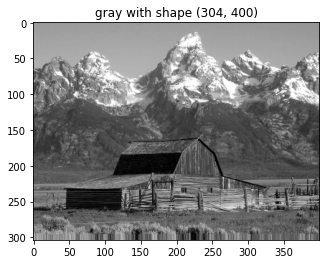

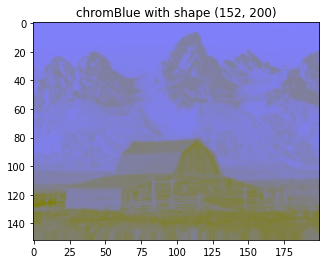

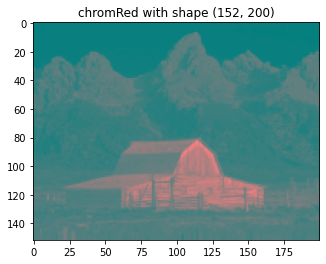

In [198]:
y_d, cb_d, cr_d = ex6()

### 6.3 Analysis of the compression obtained from the downsampling



In the 4:2:2 downsampling scheme, both chrominance channels are downsampled to their half horizontally, which constitutes a 50% compression in those channels; while the Y channel remains unaffected. Because of this, the compression achieved is $1-(\frac{\frac{1}{2} + \frac{1}{2} + 1}{3})  = \frac{1}{3} $, or around 33.3%. 

On the other hand, in the 4:2:0 downsampling scheme, both chrominance channels are downsampled to their half horizontally and vertically, which makes them be reduced to only a fourth of the inicial storage; while the Y channel remains unaffected as well. This result in a final compression of $1-(\frac{\frac{1}{4} + \frac{1}{4} + 1}{3})  = \frac{1}{2} $, or 50%.

Given that the destructivity rate is the same as the compression rate, in this destructive scheme, it can be inferred that the latter method is more destructive than the former. The data that is no longer represented cannot be recovered with exatitude, in the posterior upsampling fase.

In [199]:
#7 - DCT
def dct_array(channel):
    return dct(dct(channel, norm="ortho").T, norm='ortho').T
    #ans=np.round(ans)
    #return ans.astype(np.uint8)

def idct_array(dct_channel_arr):
    ans = idct(idct(dct_channel_arr, norm="ortho").T, norm='ortho').T
    # ans=np.round(ans)
    # ans[ans>255] =255
    # ans[ans<0] =0
    return ans

def dct_image(y_d, cb_d, cr_d):
    dct_y  = dct_array(y_d)
    dct_cb = dct_array(cb_d)
    dct_cr = dct_array(cr_d)
    return dct_y, dct_cb, dct_cr

def idct_image(dct_y, dct_cb, dct_cr):
    idct_y  = idct_array(dct_y)
    idct_cb = idct_array(dct_cb)
    idct_cr = idct_array(dct_cr)
    return idct_y, idct_cb, idct_cr

def ex7_1():
    dct_y, dct_cb, dct_cr = dct_image(y_d, cb_d, cr_d)
    dcts= {"y":dct_y,"cb":dct_cb,"cr":dct_cr}
    idct_y, idct_cb, idct_cr = idct_image(dct_y, dct_cb, dct_cr)
    idcts = {"y":idct_y,"cb":idct_cb,"cr":idct_cr}
    for name, channel in dcts.items():
        fig = plt.figure()
        # plt.title(f"{name} dct - log(2*x/sqrt(M*N)+0.0001)")
        channel_size =channel.shape[0] * channel.shape[1]
        # sh = plt.imshow(np.log(np.abs(2*channel/math.sqrt(channel_size)) + 0.0001))
        plt.title(f"{name} dct - log(abs(x)+0.0001)")
        sh = plt.imshow(np.log(np.abs(channel) + 0.0001))
        fig.colorbar(sh)
        plt.show(block=False)
    eqs1 = [idct_y,idct_cb,idct_cr]
    eqs2 = [y_d,cb_d,cr_d]
    equals=0
    for i in range(len(eqs1)):
        howmany=np.count_nonzero(np.abs(eqs1[i]-eqs2[i])>0.000001)
        if howmany==0: 
            equals +=1
        else:
            print('no of different pixels: ',np.count_nonzero(np.abs(eqs1[i]-eqs2[i])>0.000001))
            view_image(eqs1[i],cmGray)
            view_image(eqs2[i],cmGray)
            view_image(eqs2[i]-eqs1[i],cmGray)
    print('No. of equal channels: ',equals)
    

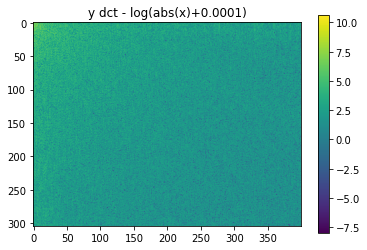

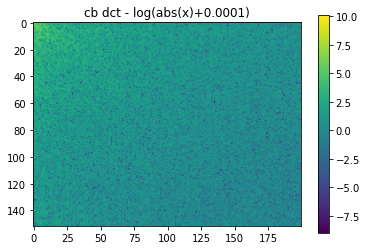

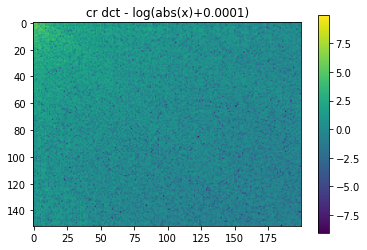

No. of equal channels:  3


In [200]:
ex7_1()

### 7.1.3 Analysis of the compression potential of the DCT

As can be seen from the graphs, there is a significant potential for compression due to the fact that the most relevant frequencies are the lowest ones, which are depicted in the top right corners. As such, if we eliminate a portion of the higher frequencies, it is expected that a faithful representation of the image should be achieved. However, when applying this method to the whole picture, abrupt color changes would disappear and the image would be very blurry, meaning that an excessive amount of information would be lost and that would easily be perceived by the human eye.

In [201]:
#7.2 DCT application in bs by bs blocks


def dct_channel_by_blocks(channel, bs):
    sh =channel.shape
    ans= np.zeros(channel.shape)
    for i in range(0,sh[0],bs):
        for j in range(0,sh[1],bs):
            portion = channel[i:i+bs, j:j+bs]
            ans[i:i+bs, j:j+bs] = dct_array(portion)
    return ans

def dct_by_blocks(y_d, cb_d, cr_d,bs):
    y_dct = dct_channel_by_blocks(y_d, bs)
    cb_dct= dct_channel_by_blocks(cb_d, bs)
    cr_dct= dct_channel_by_blocks(cr_d, bs)
    return y_dct, cb_dct, cr_dct

def idct_channel_by_blocks(dct_image, bs):
    sh =dct_image.shape
    ans= np.zeros(dct_image.shape)
    for i in range(0,sh[0],bs):
        for j in range(0,sh[1],bs):
            portion = dct_image[i:i+bs, j:j+bs]
            ans[i:i+bs, j:j+bs] = idct_array(portion)
    return ans

def idct_by_blocks(y_dct, cb_dct, cr_dct,bs):
    y_idct = idct_channel_by_blocks(y_dct, bs)
    cb_idct= idct_channel_by_blocks(cb_dct, bs)
    cr_idct= idct_channel_by_blocks(cr_dct, bs)
    return y_idct, cb_idct, cr_idct


In [202]:
#7.2.2 and 7.3.1
def ex7_23(y_d, cb_d, cr_d, bs):
    y_dct, cb_dct, cr_dct =  dct_by_blocks(y_d, cb_d, cr_d, bs)
    arrplot= [('y',y_dct),('cb',cb_dct),('cr',cr_dct)]
    for s,p in arrplot:
        view_image(np.log(np.abs(p)+0.0001),cmGray,s)
    y_idct, cb_idct,cr_idct =  idct_by_blocks( y_dct, cb_dct, cr_dct,bs)
    arrplot= [('y',cmGray,y_idct),('cb',cmChromBlue,cb_idct),('cr',cmChromRed,cr_idct)]
    # for s,c,p in arrplot: # Visualization of the inverse images
    #     view_image(p,c,s)
    eqs1 = [y_idct,cb_idct,cr_idct]
    eqs2 = [y_d,cb_d,cr_d]
    equals=0
    for i in range(len(eqs1)):
        howmany=np.count_nonzero(np.abs(eqs1[i]-eqs2[i])>0.000001)
        if howmany==0: 
            equals +=1
        else:
            print('no of different pixels: ',np.count_nonzero(np.abs(eqs1[i]-eqs2[i])>0.000001))
            view_image(eqs1[i],cmGray)
            view_image(eqs2[i],cmGray)
            view_image(eqs2[i]-eqs1[i],cmGray)
    print('No. of equal channels: ',equals)
    return y_dct, cb_dct, cr_dct


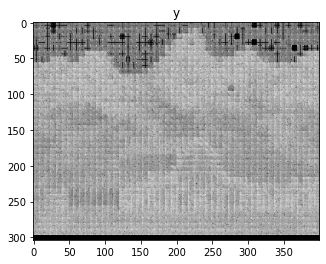

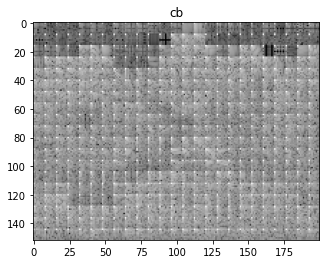

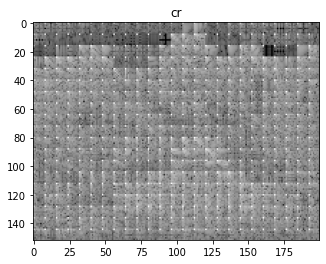

No. of equal channels:  3


In [203]:
#  remember to use padding
y_dct8, cb_dct8, cr_dct8 = ex7_23(y_d, cb_d, cr_d, 8)

# 7.2.3 Compression potential with 8 by 8 blocks

Using multiple blocks per image, instead of only one, it is less likely that there are abrupt color transitions within the block, which is when the most information is lost. With smaller block sizes, even images with a wide range of colors may not lose too much information, as the probability of the colors inside the block being smoothly transitioned increases. With the results of 7.2.2, 8x8 blocks appear to be a good compromise, as the majority of blocks are filled with null values in the AC coefficients corresponding to higher frequencies. 




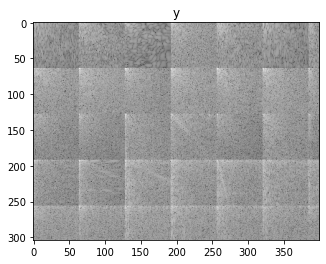

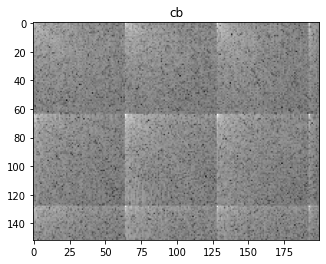

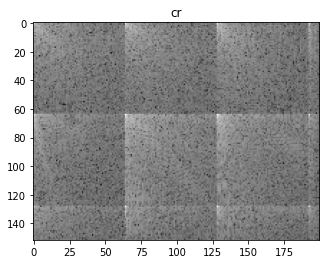

No. of equal channels:  3


In [204]:
# remenber to use different padding
y_dct64, cb_dct64, cr_dct64 = ex7_23(y_d, cb_d, cr_d, 64)

# 7.3.2 Compression potential with 64 by 64 blocks: comparison

As can be seen from the DCT images, the AC values are much more disperse than when the 8-by-8-block DCT is applied, even in nearby positions. Because of this, even after quantization, delta encoding (and, consequently, entropic encoding) would be less efficient at compressing those values. Also, due to image variability, it would be harder to create a standard quantization matrix. This is all due to the fact that, when applying DCT in large blocks, several unrelated features can be encompassed in the same block, leading to little correlation between coefficients. On the other hand, 8-by-8-blocks lead to greater similarity between coefficients and greater compression potential.

In [205]:
QUANTIZATION_MATRIX_Y = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]]).astype(np.uint8)
QUANTIZATION_MATRIX_CBCR = np.array([[17,18,24,47,99,99,99,99],[18,21,26,66,99,99,99,99],[24,26,56,99,99,99,99,99],[47,66,99,99,99,99,99,99],[99,99,99,99,99,99,99,99],[99,99,99,99,99,99,99,99],[99,99,99,99,99,99,99,99],[99,99,99,99,99,99,99,99]]).astype(np.uint8)

def repeat_matrix(m, rows, columns):
    return np.tile(m, (rows, columns)) # makes a larger matrix by repeating m throughout the two axes


def calculate_quant(matrix, channel):
    big_matrix = repeat_matrix(matrix, channel.shape[0]//matrix.shape[0], channel.shape[1]//matrix.shape[1])
    return np.round(channel/big_matrix)


def quality_factor_matrix(quality):
    Q_y = np.array(QUANTIZATION_MATRIX_Y)
    Q_cbcr = np.array(QUANTIZATION_MATRIX_CBCR)
    if( quality < 50):
        qual_factor = 50/quality
    else:
        qual_factor = (100-quality)/50

    if qual_factor == 0:
        Q_y=np.ones((8,8))
        Q_cbcr=np.ones((8,8))
    else:
        Q_y = np.round(Q_y * qual_factor)
        Q_y[Q_y>255]= 255
        Q_y[Q_y<1]=1
        Q_y=Q_y.astype(np.uint8)
        Q_cbcr = np.round(Q_cbcr * qual_factor)
        Q_cbcr[Q_cbcr>255]= 255
        Q_cbcr[Q_cbcr<1]=1
        Q_cbcr=Q_cbcr.astype(np.uint8)
    return Q_y, Q_cbcr
        

def quantize(y_dct, cb_dct, cr_dct , quality):

    Q_y, Q_cbcr= quality_factor_matrix(quality)

    y_q = calculate_quant(Q_y, y_dct)
    cb_q = calculate_quant(Q_cbcr, cb_dct)
    cr_q = calculate_quant(Q_cbcr, cr_dct)
    return y_q, cb_q, cr_q


def calculate_inverse_quant(matrix, channel):
    big_matrix = repeat_matrix(matrix, channel.shape[0] // matrix.shape[0], channel.shape[1]// matrix.shape[1])
    return np.round(channel * big_matrix)


def inverse_quant(y_q, cb_q, cr_q, quality):

    Q_y, Q_cbcr= quality_factor_matrix(quality)

    i_y_q = calculate_inverse_quant(Q_y, y_q)
    i_cb_q = calculate_inverse_quant(Q_cbcr, cb_q)
    i_cr_q = calculate_inverse_quant(Q_cbcr, cr_q)

    return i_y_q, i_cb_q, i_cr_q



In [206]:
def ex_8_2(y_dct8, cb_dct8, cr_dct8):
    y_q = np.array([])
    cb_q = np.array([])
    cr_q = np.array([])
    qualities = [100,75,50,25,10]
    for q in qualities:
        y_q, cb_q, cr_q = quantize(y_dct8, cb_dct8, cr_dct8, quality = q)
        i_y_q, i_cb_q, i_cr_q = inverse_quant(y_q, cb_q, cr_q , quality=q)
        view_image(np.log(np.abs(i_y_q)+0.0001), cmGray, title = f'y_{q}')
        view_image(np.log(np.abs(i_cb_q)+0.0001), cmGray,title = f'cb_{q}')
        view_image(np.log(np.abs(i_cr_q)+0.0001), cmGray,title = f'cr_{q}')
    return y_q, cb_q, cr_q
    

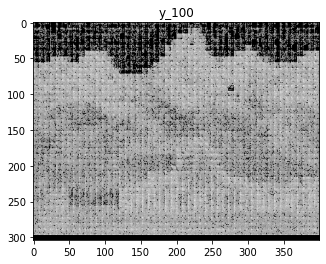

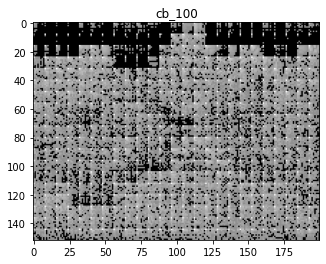

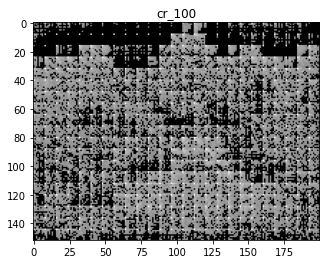

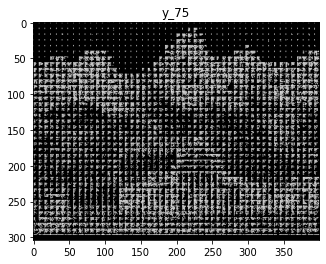

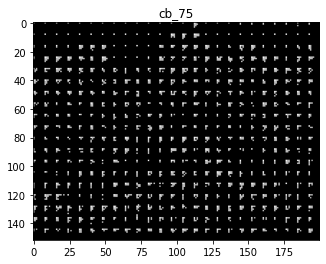

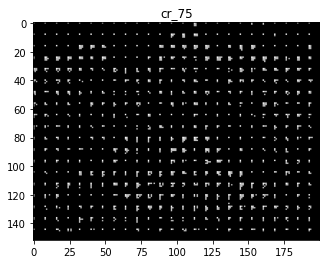

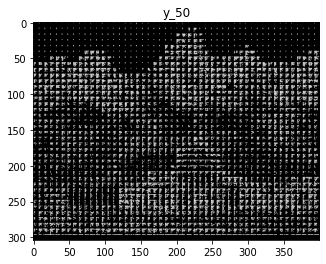

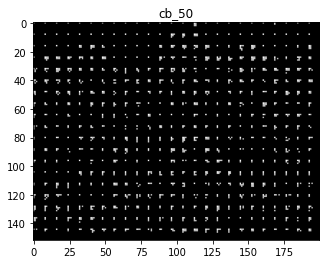

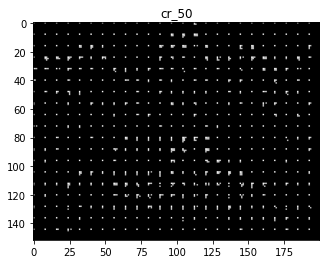

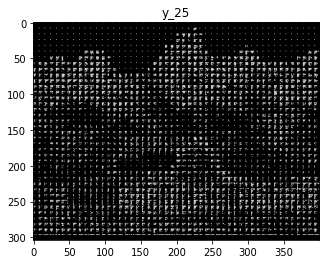

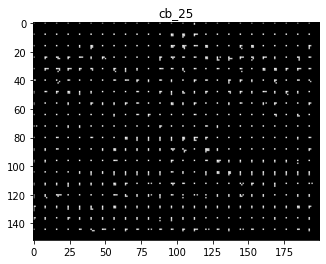

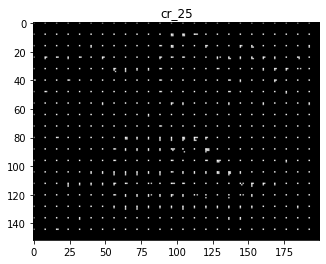

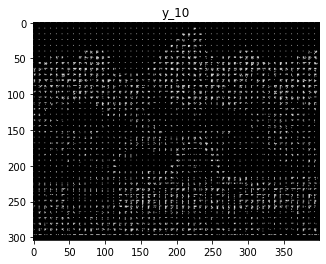

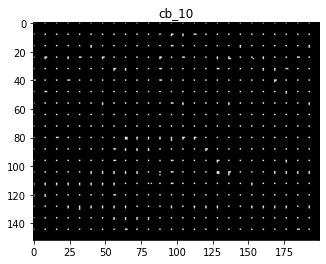

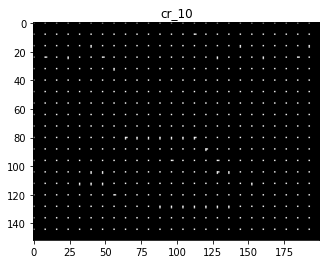

In [207]:
y_q, cb_q, cr_q = ex_8_2(y_dct8, cb_dct8, cr_dct8)

## 8.3 Comparison among the quality factors

As the quality factor decreases, the respective quantized DCT images get progressively darker, which can be explained by the fact that in lower qualities, the coefficients in the quantization matrix are closer to 255. As such, a division by these indices will yield 0, represented in black. This leads to the conclusion that, the lower the quality, the higher the number of zeroes in the AC coefficients. As such, higher compression rates can be achieved in this way, in expense of image details and overall quality. 

Looking at the quantized DCTs with quality 75, it can be seen that most of the AC coefficients with higher frequencies are already very close to 0, so it is not necessary to sacrifice significant quality in order to obtain performant compression ratios: in this case, using delta encoding would lead to a little gamut of values, with little entropy; and this could be used by entropic encoding methods to significantly reduce the storage space of the final file. This is due to the fact that these higher frequencies are less distinguishable to the human eye, so quantizing them in this way does not significantly harm perceptive quality.


## 8.4 Comparison of compression potential with and without quantization

Comparing the image DCTs without quantization and with 75% quantization, we see that the variety of values is much more significant in the former; and that there is a significant amount of zeros in the latter, especially in the Cb and Cr channels. As such, the quantity of bits necessary to compress the image with quantization is obviously smaller, so a greater compression potential is achieved by this method.

In [208]:
# assuming we only use 8x8 blocks
def DPCM_channel(channel, bs):
    # sh=channel.shape
    aux_channel = np.array(channel)
    aux_channel[::bs,bs::bs] -= channel[::bs,0:-bs:bs]
    aux_channel[bs::bs,0] -= channel[0:-bs:bs,-bs]
    return aux_channel    

def DPCM(y_q, cb_q, cr_q, bs):
    dpcm_y = DPCM_channel(y_q, bs)
    dpcm_cb = DPCM_channel(cb_q, bs)
    dpcm_cr = DPCM_channel(cr_q, bs)
    return dpcm_y, dpcm_cb, dpcm_cr

def IDPCM_channel(channel, bs):
    copy = np.array(channel)
    sh= channel.shape
    aid = channel[::bs,::bs].flatten()
    aid = np.cumsum(aid).reshape(sh[0]//bs,sh[1]//bs)
    copy[::bs,::bs] = aid
    return copy

def IDPCM(dpcm_y, dpcm_cb, dpcm_cr,bs) :
    idpcm_y = IDPCM_channel(dpcm_y, bs)
    idpcm_cb = IDPCM_channel(dpcm_cb, bs)
    idpcm_cr = IDPCM_channel(dpcm_cr, bs)
    return idpcm_y, idpcm_cb, idpcm_cr

def entropy(counts: np.ndarray) -> float:
    sm = np.sum(counts)
    return -np.sum(counts/sm * np.log2(counts/sm))

def ex_9(y_q, cb_q, cr_q, bs):
    dpcm_y, dpcm_cb, dpcm_cr = DPCM(y_q, cb_q, cr_q,bs)
    idpcm_y, idpcm_cb, idpcm_cr = IDPCM(dpcm_y, dpcm_cb, dpcm_cr,bs)
    eqs1 = [y_q,cb_q,cr_q]
    eqs2 = [idpcm_y, idpcm_cb, idpcm_cr]
    equals=0
    for i in range(len(eqs1)):
        howmany=np.count_nonzero(np.abs(eqs1[i]-eqs2[i])>0.000001)
        if howmany==0: 
            equals +=1
        else:
            print('no of different pixels: ',np.count_nonzero(np.abs(eqs1[i]-eqs2[i])>0.000001))
            view_image(eqs1[i],cmGray,'original')
            view_image(eqs2[i],cmGray,'encoded')
            view_image(eqs2[i]-eqs1[i],cmGray,'difference')
    print(f'No. of equal channels: {equals}')
    channels_names = ['Channel y','Channel cb','Channel cr']
    relevant_encoded = [dpcm_y, dpcm_cb, dpcm_cr]
    previous_values = [y_q, cb_q, cr_q]
    for i in range(len(previous_values)):
        values1, counts1 = np.unique(previous_values[i][::8,::8], return_counts=True)
        values2, counts2 = np.unique(relevant_encoded[i][::8,::8], return_counts=True)
        ent1 = entropy(counts1)
        ent2 = entropy(counts2)
        print(channels_names[i]+':')
        print(f'Previous unique values: {len(values1)}; current unique values: {len(values2)}, previous entropy : {ent1}, current entropy: {ent2}')
        print(f'Entropy reduction: {(ent1-ent2)/ent1 * 100}%')
        plt.figure()
        plt.subplot(121)
        plt.title('Histogram for original data')
        plt.bar(values1, counts1)
        plt.subplot(122)
        plt.title('Histogram for encoded data')
        plt.bar(values2, counts2)
        plt.show()
    return dpcm_y, dpcm_cb, dpcm_cr


    

    

No. of equal channels: 3
Channel y:
Previous unique values: 25; current unique values: 22, previous entropy : 4.006214602028605, current entropy: 2.7863413553745064
Entropy reduction: 30.44952324911396%


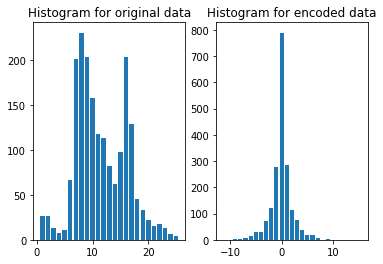

Channel cb:
Previous unique values: 10; current unique values: 10, previous entropy : 2.988736534926115, current entropy: 1.6289323598441598
Entropy reduction: 45.49762614373672%


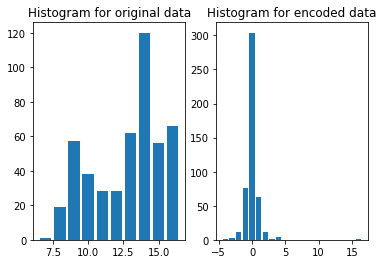

Channel cr:
Previous unique values: 6; current unique values: 7, previous entropy : 1.9405124991249156, current entropy: 1.0752313695983102
Entropy reduction: 44.590340434128024%


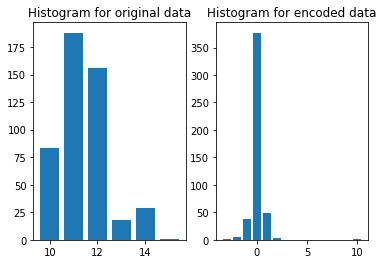

In [209]:
dpcm_y, dpcm_cb, dpcm_cr = ex_9(y_q, cb_q, cr_q,8)

# 9.3 Result analysis

From the histograms presented, it can be seen that the entropy of the data encoded with DPCM is significantly smaller than the original data (30% to 45% in this image), as most encoded values are zero. As such, harnessing color locality after applying the DCT leads to a greater compression potential, without discarding any information, as the number of bits necessary to represent these sequences is diminuished.


In [210]:
def plot_debug(ch1, ch2, ch3):
    plt.figure()
    plt.subplot(131)
    plt.imshow(ch1,cmGray)
    plt.subplot(132)
    plt.imshow(ch2, cmGray)
    plt.subplot(133)
    plt.imshow(ch3, cmGray)
    plt.show(block=False)

In [211]:
def mean_square_error(image_original, image_rebuilt):
    lines = len(image_original)
    columns = image_original.shape[1]
    io = image_original.astype(np.float32)
    ir = image_rebuilt.astype(np.float32)
    return np.sum((io-ir)**2)/(lines * columns)

def root_mean_square_error(image_original, image_rebuilt):
    return math.sqrt(mean_square_error(image_original, image_rebuilt))

def signal_to_noise_ratio(image_original, image_rebuilt):
    lines = len(image_original)
    columns = image_original.shape[1]
    io = image_original.astype(np.float32)
    potence = np.sum(io**2)/(lines* columns)
    return 10*math.log10(potence / mean_square_error(image_original, image_rebuilt))

def peak_signal_to_noise_ratio(image_original, image_rebuilt):
    io = image_original.astype(np.float32)
    peak = np.max(io)**2
    return 10*math.log10(peak/mean_square_error(image_original, image_rebuilt))


In [212]:
def calculate_quality_metrics(images, qualities, image_file):
    image_original= plt.imread(image_file)

    metrics = ['MSE', 'RMSE', 'SNR', 'PSNR']
    metric_functions = [mean_square_error, root_mean_square_error, signal_to_noise_ratio, peak_signal_to_noise_ratio]
    table=[]
    for m in range(len(metric_functions)):
        table_row = [metrics[m]]
        for i in range(len(qualities)):
            table_row.append(metric_functions[m](image_original, images[i]))
        table.append(table_row)
    
    print(tabulate(table, headers=['quality']+qualities))
    


In [213]:
#    plt.imshow(np.log(np.abs(y_q)+0.0001))
def encode(img_name, ds_rate: tuple, quality, bs=8) -> None:
    img= plt.imread(img_name)
    img_padded , original_shape = image_padding(img, ds_rate, bs)
    chromin_image = rbg2ycbcr(img_padded)
    y, cb,cr = separate_3channels(chromin_image)
    #plot_debug(y, cb,cr)
    y_d,cr_d,cb_d = ycrcb_downsampling_cv2(y,cr,cb, ds_rate)
    #plot_debug(y_d,cr_d,cb_d)
    dct_y, dct_cb, dct_cr = dct_by_blocks(y_d, cb_d, cr_d ,bs)
    #plot_debug(dct_y, dct_cb, dct_cr)
    y_q, cb_q, cr_q = quantize(dct_y,dct_cb,dct_cr, quality)
    #print(y_q[0:8,8:16])
    #plot_debug(y_q, cb_q, cr_q)
    dpcm_y, dpcm_cb, dpcm_cr = DPCM(y_q, cb_q, cr_q, bs)
    #print(dpcm_y[0:8,8:16])

    #plot_debug(dpcm_y, dpcm_cb, dpcm_cr)
    return dpcm_y, dpcm_cb, dpcm_cr , original_shape, quality, bs, ds_rate, y


In [214]:
def decode(dpcm_y, dpcm_cb, dpcm_cr, original_shape, quality, bs, ds_rate, y, image_file):
    idpcm_y, idpcm_cb, idpcm_cr = IDPCM(dpcm_y, dpcm_cb, dpcm_cr,bs)
    #print(idpcm_y[0:8,8:16])

    #plot_debug(idpcm_y, idpcm_cb, idpcm_cr)
    i_y_q, i_cb_q, i_cr_q = inverse_quant(idpcm_y, idpcm_cb, idpcm_cr , quality)

    #plot_debug(i_y_q, i_cb_q, i_cr_q)
    y_d, cb_d, cr_d = idct_by_blocks(i_y_q, i_cb_q, i_cr_q, bs ) 

    #plot_debug(y_d, cb_d, cr_d)
    y_u,cr_u, cb_u = ycrcb_upsampling_cv2(y_d,cr_d, cb_d, ds_rate)

    err = np.abs(y-y_u)
    print("Max error: ", np.max(err))
    view_image(err, cmGray, f"Error: image {image_file} with quality {quality}")
    
    #plot_debug(y_u,cr_u, cb_u)
    encoded= join_3channels(y_u,cb_u,cr_u)

    inverse_chromin = ycbcr2rgb(encoded)

    img = image_remove_padding(inverse_chromin, original_shape)


    return img


In [215]:
def encode_and_decode(img_name, ds_rate: tuple, quality, bs=8):
    img= plt.imread(img_name)
    img_padded , original_shape = image_padding(img, ds_rate, bs)
    chromin_image = rbg2ycbcr(img_padded)
    y, cb,cr = separate_3channels(chromin_image)
    # plot_debug(y, cb,cr)
    y_d,cr_d,cb_d = ycrcb_downsampling_cv2(y,cr,cb, ds_rate)
    # plot_debug(y_d,cr_d,cb_d)
    dct_y, dct_cb, dct_cr = dct_by_blocks(y_d, cr_d, cb_d ,bs)
    # plot_debug(dct_y, dct_cb, dct_cr)
    y_q, cb_q, cr_q = quantize(dct_y,dct_cb,dct_cr, quality)
    # plot_debug(y_q, cb_q, cr_q)
    dpcm_y, dpcm_cb, dpcm_cr = DPCM(y_q, cb_q, cr_q, bs)
    # plot_debug(dpcm_y, dpcm_cb, dpcm_cr)
    print('-----------------------------decoding-----------------------------')
    idpcm_y, idpcm_cb, idpcm_cr = IDPCM(dpcm_y, dpcm_cb, dpcm_cr,bs)
    # plot_debug(idpcm_y, idpcm_cb, idpcm_cr)
    compare_3channels(idpcm_y, idpcm_cb, idpcm_cr,y_q, cb_q, cr_q)
    i_y_q, i_cb_q, i_cr_q = inverse_quant(idpcm_y, idpcm_cb, idpcm_cr , quality)

    # plot_debug(i_y_q, i_cb_q, i_cr_q)
    y_d, cb_d, cr_d = idct_by_blocks(i_y_q, i_cb_q, i_cr_q, bs ) 

    # plot_debug(y_d, cb_d, cr_d)
    y_u,cr_u, cb_u = ycrcb_upsampling_cv2(y_d,cr_d, cb_d, ds_rate)
    
    # plot_debug(y_u,cr_u, cb_u)
    encoded= join_3channels(y_u,cb_u,cr_u)

    inverse_chromin = ycbcr2rgb(encoded)

    img = image_remove_padding(inverse_chromin, original_shape)


    return img

In [216]:
def main():
    ds_ratio = (4,2,0)
    bs=8
    image_files=[ 'images/peppers.bmp', 'images/barn_mountains.bmp', 'images/logo.bmp']
    #image_files=[  'images/barn_mountains.bmp']
    qualities = [1,10,25,50,75,100]
    #qualities = [75]
    for image_file in image_files:
        restored_images=[]
        for quality in qualities:
            dpcm_y, dpcm_cb, dpcm_cr , original_shape, quality, bs, ds_rate, y = encode(image_file, ds_ratio, quality, 8)
            decoded= decode(dpcm_y, dpcm_cb, dpcm_cr , original_shape, quality, bs, ds_rate,y, image_file)
            
            #decoded = encode_and_decode('imagens/peppers.bmp', ds_ratio, quality, 8)
            plt.figure()
            plt.title(f'Post decoding: image {image_file} with quality {quality}')
            plt.imshow(decoded)
            plt.show(block=False)
            restored_images.append(decoded)
            
        calculate_quality_metrics(restored_images, qualities, image_file)

Max error:  171.07500000000005


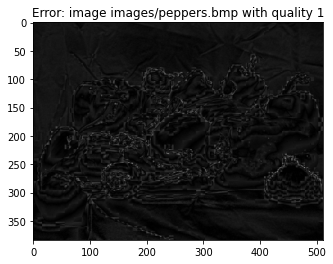

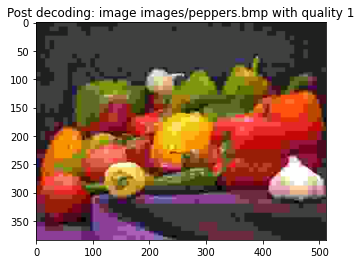

Max error:  92.86285222175734


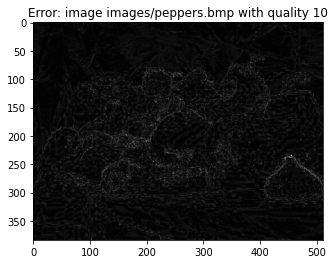

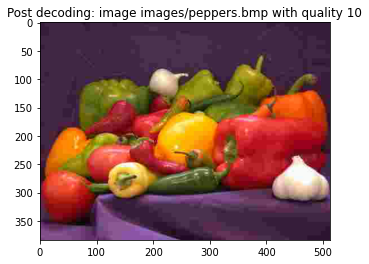

Max error:  74.84848163370421


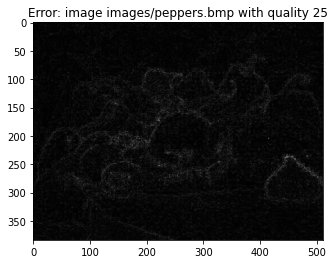

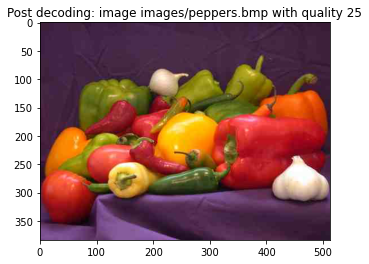

Max error:  32.37497957382345


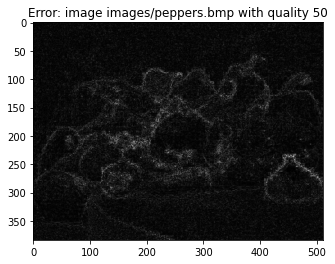

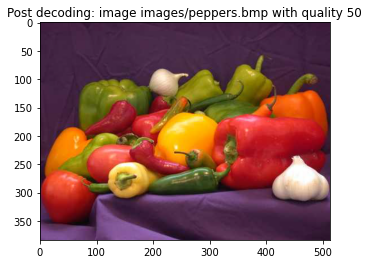

Max error:  29.79638737593197


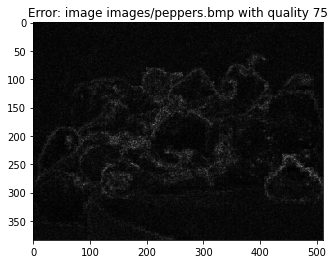

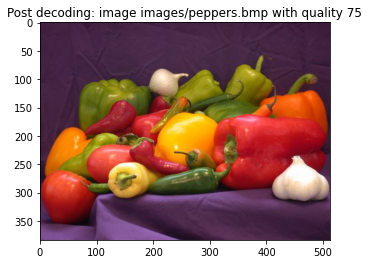

Max error:  1.4421531528544946


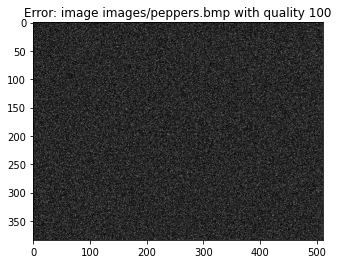

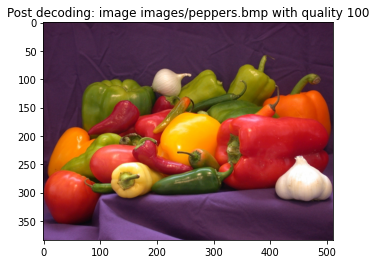

quality            1        10        25        50        75       100
---------  ---------  --------  --------  --------  --------  --------
MSE        1506.02    354.491   174.943   119.649   85.9111   30.317
RMSE         38.8075   18.8279   13.2266   10.9384   9.26882   5.50609
SNR          13.1476   19.4299   22.497    24.1469  25.5855   30.1091
PSNR         16.3525   22.6347   25.7018   27.3517  28.7903   33.3139
Max error:  146.53799999999995


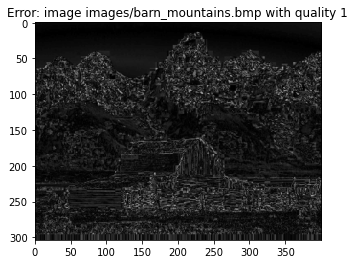

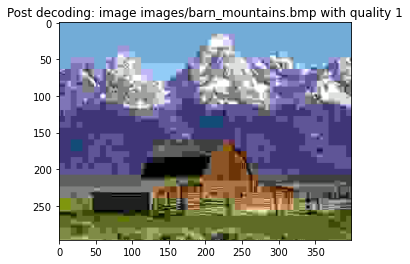

Max error:  102.56833675198288


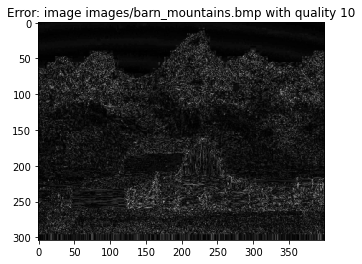

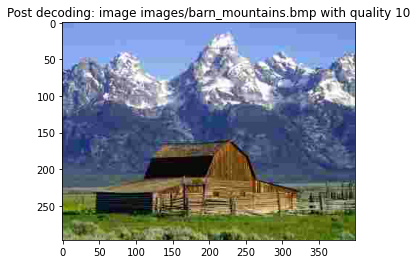

Max error:  83.14915846053103


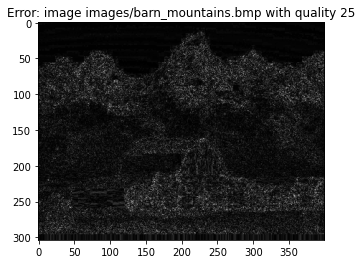

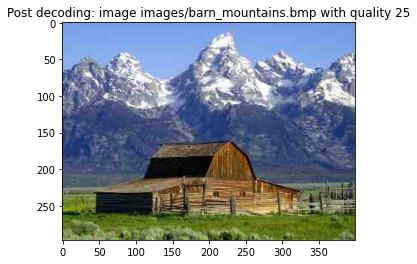

Max error:  87.1540519757548


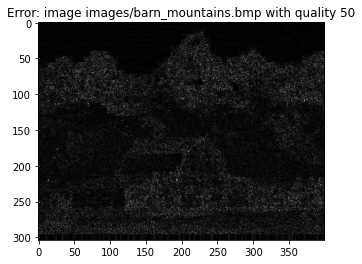

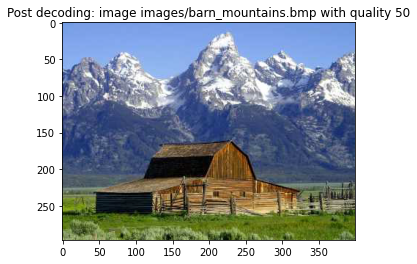

Max error:  43.113921056334505


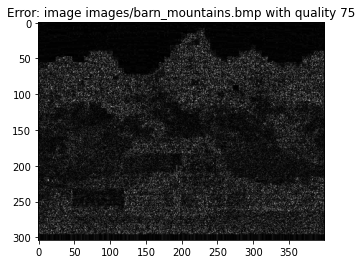

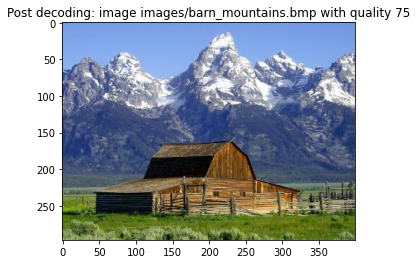

Max error:  1.2502486051934136


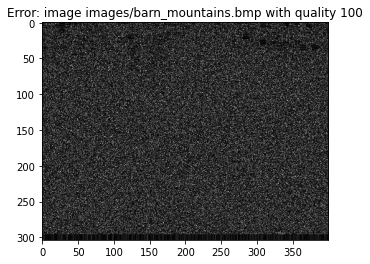

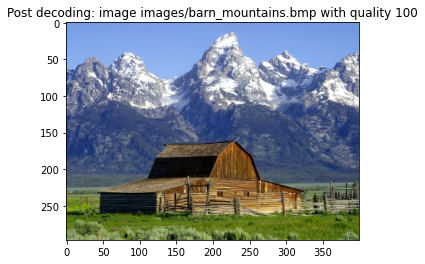

quality            1        10        25        50        75       100
---------  ---------  --------  --------  --------  --------  --------
MSE        1941.04    743.961   426.179   286.839   177.258   28.9688
RMSE         44.0572   27.2757   20.6441   16.9363   13.3138   5.38227
SNR          14.3059   18.4708   20.8904   22.6099   24.7002  32.567
PSNR         15.2505   19.4153   21.8349   23.5544   25.6447  33.5115
Max error:  201.05


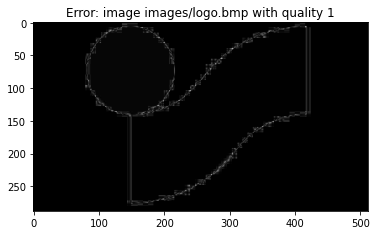

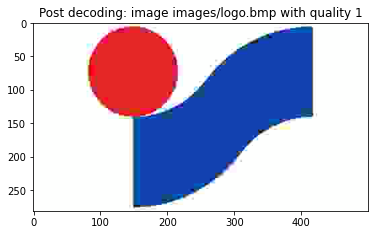

Max error:  103.95190350616537


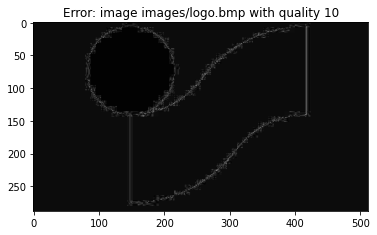

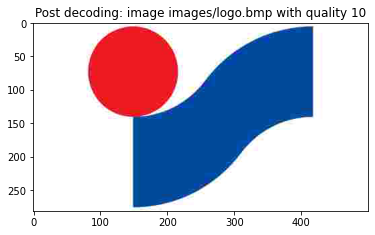

Max error:  58.36257121216562


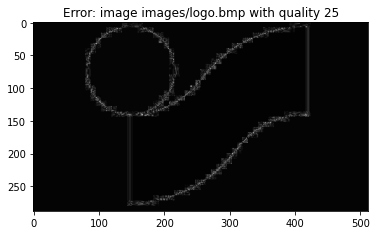

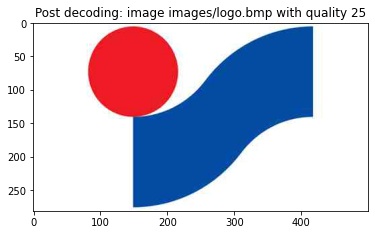

Max error:  47.40718337637203


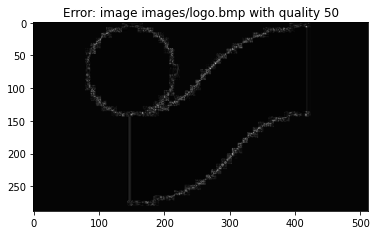

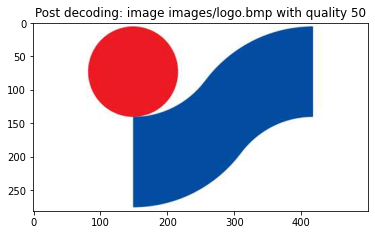

Max error:  28.99150004857961


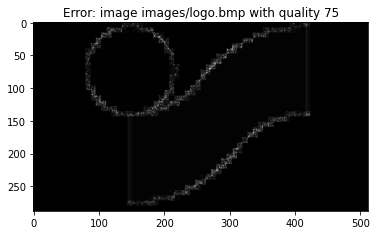

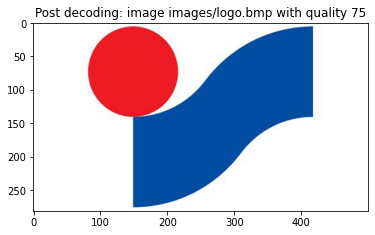

Max error:  1.9445150584361386


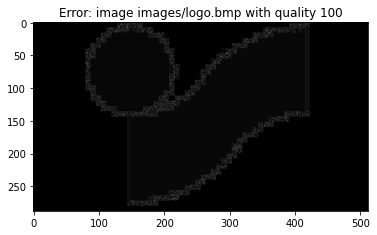

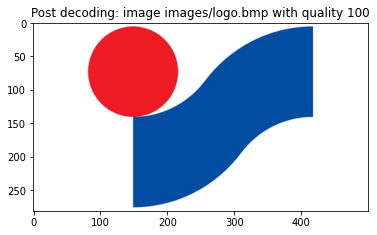

quality           1        10        25        50        75       100
---------  --------  --------  --------  --------  --------  --------
MSE        599.853   191.592   91.5343   63.7184   43.0481   18.8768
RMSE        24.4919   13.8417   9.56735   7.98238   6.56111   4.34475
SNR         23.5517   28.5084  31.7163   33.2895   34.9926   38.5728
PSNR        20.3504   25.307   28.515    30.0882   31.7913   35.3715


In [217]:
main()

# 10.2 Result analysis

As expected, a decrease in quality led to an increase in the error metrics and to a decrease in the signal-to-noise ratios. With this decrease, the compression became more and more destructive and discarded a growing number of details. This happened in all images, considering the data in the tables. 

It was also noticed that the image with the overall smoothest color transitions (logo.bmp) has the most accurate representation in all qualities (apart from the color borders), as the error metrics associated to it are significantly smaller. This reinforces the fact that this codec works best for images with soft colour transitions.

